# Baja Finance Stock Price Analysis

### Prerequisites

Installing required libraries with pandas, matplotlib, and seaborn libraries.

In [ ]:
pip install pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 7.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 7.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 9.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 7.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.6 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


#### Step 1. Lets import these files 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Step 2. Load the data from csv files
We will upload the file into dataframe.
The primary task will be see the data type at head with this.

In [4]:
df=pd.read_csv("./StockMarket/BAJFINANCE.NS.csv")
print(df.head())

         Date      Open      High       Low     Close  Adj Close    Volume
0  2002-07-01  5.239737  5.656546  5.239737  5.590478   4.117699  203995.0
1  2002-07-08  5.501093  5.758562  4.978382  5.319407   3.918041  548403.0
2  2002-07-15  5.324265  5.479718  4.618897  5.151323   3.794237  137526.0
3  2002-07-22  5.080398  5.146465  4.729657  4.871508   3.588138  186250.0
4  2002-07-29  4.223463  4.610153  3.903813  4.498421   3.313339  148651.0


### What we know now?
The output from df.head() displays the first five rows of your stock price history data. Each row represents a week, and the columns provide information on various attributes of the stock price during that week. Here's a brief description of each column:

* Date: The starting date of the week for which the data is recorded (in this case, Mondays). The dates are in the format YYYY-MM-DD.

* Open: The opening stock price at the beginning of the week.

* High: The highest stock price reached during the week.

* Low: The lowest stock price reached during the week.

* Close: The closing stock price at the end of the week.

* Adj Close: The adjusted closing price, which is the closing price adjusted for dividends, stock splits, and new stock offerings. This is a more accurate reflection of the stock's value as it accounts for events that impact the stock price.

* Volume: The total number of shares traded during the week.

By analyzing this data, you can gain insights into stock price trends, volatility, and liquidity. Additionally, you can perform further calculations to determine various financial metrics and ratios, such as moving averages, rate of change, and other technical indicators to make informed investment decisions.



### Step 3: Clean and preprocess the data

In [5]:
print(df.isnull().sum())

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


When running `print(df.isnull().sum())`, it shows the number of missing (null) values in each column of the DataFrame. The output provided indicates the following:

- **Date**: No missing values (0 nulls).
- **Open**: One missing value (1 null).
- **High**: One missing value (1 null).
- **Low**: One missing value (1 null).
- **Close**: One missing value (1 null).
- **Adj Close**: One missing value (1 null).
- **Volume**: One missing value (1 null).

Now that there are missing values in your dataset, lets explaore how to handle them. You can either drop the rows with missing values or fill them with appropriate values, such as the mean, median, or interpolated values from surrounding data points.

To drop the rows with missing values:

```python
df = df.dropna()
```

To fill the missing values with the mean of the respective columns:

```python
df = df.fillna(df.mean())
```

Keep in mind that the method you choose to handle missing values depends on the nature of the data and the analysis to be performed. In some cases, dropping the missing values might be more appropriate, while in others, filling them with the mean, median, or interpolated values might be a better option. In this case, we are going to drop the row since it is just one row.

In [6]:
df=df.dropna()

### Step 4: Perform exploratory data analysis (EDA)

In [7]:
print(df.describe())

              Open         High          Low        Close    Adj Close   
count  1087.000000  1087.000000  1087.000000  1087.000000  1087.000000  \
mean   1317.189283  1363.815541  1271.149951  1322.387956  1313.427083   
std    2126.291493  2195.467536  2058.928970  2131.516944  2125.416360   
min       3.953364     4.245810     3.673548     4.064124     2.993454   
25%      30.264755    32.552343    29.429195    30.638814    27.828747   
50%     115.132378   121.495003   110.000000   115.019997   111.788040   
75%    1826.000000  1865.950012  1765.500000  1837.500000  1817.374024   
max    8050.000000  8050.000000  7750.000000  7862.899902  7834.374023   

             Volume  
count  1.087000e+03  
mean   4.502500e+06  
std    8.752881e+06  
min    1.813300e+04  
25%    5.491495e+05  
50%    1.748611e+06  
75%    4.946326e+06  
max    9.322902e+07  


The `print(df.describe())` function provides a summary of the central tendency, dispersion, and distribution shape of your dataset for each numerical column. Here's what the output tells you:

1. **count**: The total number of non-null (valid) values in each column.
2. **mean**: The average value of each column.
3. **std**: The standard deviation of each column, which is a measure of the dispersion or spread of the data.
4. **min**: The minimum value in each column.
5. **25%**: The first quartile value (Q1) in each column, which is the value at the 25th percentile. 25% of the data falls below this value.
6. **50%**: The median or second quartile value (Q2) in each column, which is the value at the 50th percentile. 50% of the data falls below this value.
7. **75%**: The third quartile value (Q3) in each column, which is the value at the 75th percentile. 75% of the data falls below this value.
8. **max**: The maximum value in each column.

From this summary, you can gather information about the distribution of the data in each column. For example, you can see that the average (mean) opening price is around 1317.19, while the median (50th percentile) opening price is 115.13. This suggests that the opening prices are positively skewed, with a few very high values pulling the mean upward.

Similarly, you can observe that the average trading volume is approximately 4.5 million shares, with a standard deviation of 8.75 million shares. This indicates that there is a considerable variation in the trading volume across the weeks in the dataset.

These descriptive statistics can help you better understand the data and inform the subsequent analysis or visualization steps.

### Step 5: Calculate descriptive statistics

Calculate the correlation between the weekly prices. But *HOW*? 

We will do this by calculating the correlation matrix of the numerical columns in the DataFrame using the `df.corr()` function. The correlation matrix is a square matrix that shows the correlation coefficients between each pair of variables. 

The correlation coefficient, often denoted as 'r', is a statistical measure of the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where:

- A value of 1 indicates a perfect positive linear relationship (i.e., when one variable increases, the other variable also increases, and vice versa).
- A value of -1 indicates a perfect negative linear relationship (i.e., when one variable increases, the other variable decreases, and vice versa).
- A value of 0 indicates no linear relationship between the two variables.

The `df.corr()` function computes the correlation coefficients using the Pearson correlation method by default, which is a widely used measure of linear correlation between two variables.

Here's an example of how the output might look:

```
           Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998971  0.998563  0.998352   0.998259 -0.439086
High       0.998971  1.000000  0.998395  0.998980   0.998893 -0.436275
Low        0.998563  0.998395  1.000000  0.998816   0.998714 -0.443810
Close      0.998352  0.998980  0.998816  1.000000   0.999909 -0.439559
Adj Close  0.998259  0.998893  0.998714  0.999909   1.000000 -0.439778
Volume    -0.439086 -0.436275 -0.443810 -0.439559  -0.439778  1.000000
```

In this example, the correlation coefficients between Open, High, Low, Close, and Adj Close are close to 1, indicating a strong positive linear relationship between these variables, which is expected since they are all related to the stock price. The correlation coefficients between Volume and the other variables are negative and smaller in magnitude, suggesting a weaker and inverse relationship between Volume and stock prices.

Calculating the correlation matrix can help you identify relationships between variables in your dataset, which can be useful in various analyses, such as feature selection, portfolio optimization, and risk management.

In [8]:
correlation_matrix = df.corr()
print(correlation_matrix)

ValueError: could not convert string to float: '2002-07-01'

It returns an error :ValueError: could not convert string to float: '2002-07-01'
The error occurs because the `df.corr()` function calculates correlation coefficients only for numerical columns, and your DataFrame contains a non-numerical column (Date) with string values representing dates.

To resolve this issue, you need to exclude the non-numerical column(s) before calculating the correlation matrix. In this case, you can exclude the Date column as follows:

```python
# Create a new DataFrame without the Date column
numerical_df = df.drop(columns=['Date'])

# Calculate the correlation matrix for the numerical columns
correlation_matrix = numerical_df.corr()

# Print the correlation matrix
print(correlation_matrix)
```

By removing the Date column before calculating the correlation matrix, you'll avoid the "ValueError: could not convert string to float" error, and the function should work as expected.

In [9]:
# Create a new DataFrame without the Date column
numerical_df = df.drop(columns=['Date'])

# Calculate the correlation matrix for the numerical columns
correlation_matrix = numerical_df.corr()

# Print the correlation matrix
print(correlation_matrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999267  0.999231  0.998511   0.998514  0.348148
High       0.999267  1.000000  0.999077  0.999512   0.999506  0.359316
Low        0.999231  0.999077  1.000000  0.999237   0.999252  0.340597
Close      0.998511  0.999512  0.999237  1.000000   0.999994  0.354206
Adj Close  0.998514  0.999506  0.999252  0.999994   1.000000  0.353546
Volume     0.348148  0.359316  0.340597  0.354206   0.353546  1.000000


Here's an interpretation of the results:

Open, High, Low, Close, and Adj Close: All of these variables are related to the stock price, so it's not surprising that their correlation coefficients are close to 1, indicating a strong positive linear relationship. This means that when one of these variables increases or decreases, the others tend to increase or decrease as well. The correlation between Close and Adj Close is almost 1, which makes sense since the adjusted closing price is just the closing price adjusted for dividends, stock splits, and new stock offerings.

Volume: The correlation coefficients between Volume and the stock price variables (Open, High, Low, Close, and Adj Close) are positive, but smaller in magnitude, ranging from around 0.34 to 0.36. This indicates a moderate positive linear relationship between trading volume and stock prices. When the stock price increases or decreases, the trading volume tends to increase as well, but not as strongly as the relationships between the stock price variables.

These correlations can provide insights into the relationships between different aspects of the stock price history, which can be useful for various analyses such as identifying trends, building predictive models, or assessing the impact of trading volume on stock prices.

### Step 6: Visualize the data

Create a heatmap to visualize the correlation between the data points:

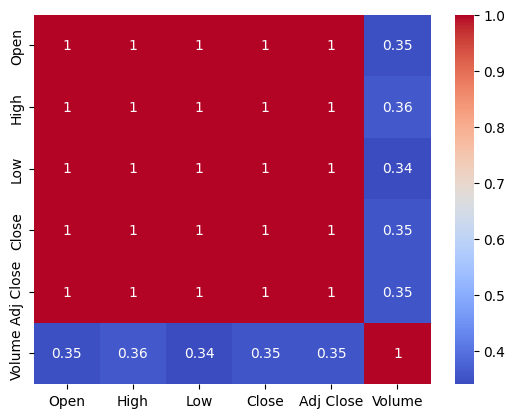

In [10]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

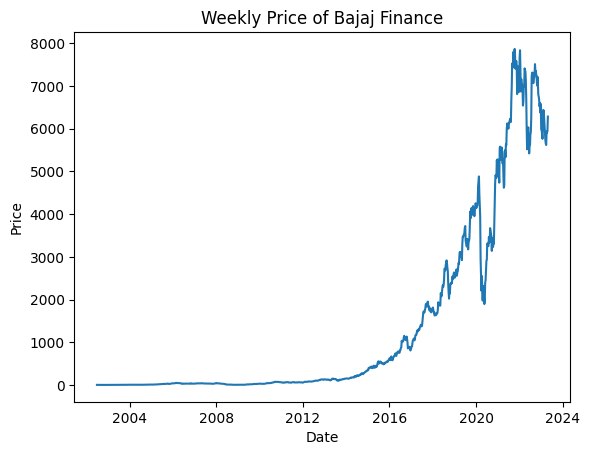

In [17]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Plot the Close (or Adj Close) prices
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price of Bajaj Finance')
plt.show()

Your code snippet is a basic example of creating a line plot using the `matplotlib.pyplot` library, where you intend to visualize the weekly price of Bajaj Finance. However, the code provided has a couple of issues:

1. The `plt.plot(df)` line will try to plot all numerical columns in the DataFrame, which might not be what you intend. If you want to specifically plot the Close (or Adj Close) prices, you should select the desired column before plotting.

2. The x-axis should ideally represent the Date, not the week number. To do this, you need to set the Date column as the index of the DataFrame before plotting.

Here's a modified version of your code:

```python
import matplotlib.pyplot as plt

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Plot the Close (or Adj Close) prices
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price of Bajaj Finance')
plt.show()
```

This code snippet first converts the 'Date' column to a datetime object using `pd.to_datetime()`, sets it as the index of the DataFrame, and then plots the 'Close' prices against the 'Date' index. This should give you a more accurate and meaningful visualization of the weekly price of Bajaj Finance.